You can order print and ebook versions of *Think Python 3e* from
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) and
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325).

In [15]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');

import thinkpython

Downloaded thinkpython.py
Downloaded diagram.py


# Variables and Statements

In the previous chapter, we used operators to write expressions that perform arithmetic computations.

In this chapter, you'll learn about variables and statements, the `import` statement, and the `print` function.
And I'll introduce more of the vocabulary we use to talk about programs, including "argument" and "module".


## Variables

A **variable** is a name that refers to a value.
To create a variable, we can write a **assignment statement** like this.

In [8]:
n = 17

An assignment statement has three parts: the name of the variable on the left, the equals operator, `=`, and an expression on the right.
In this example, the expression is an integer.
In the following example, the expression is a floating-point number.

In [9]:
pi = 3.141592653589793

And in the following example, the expression is a string.

In [2]:
message = 'And now for something completely different'

When you run an assignment statement, there is no output.
Python creates the variable and gives it a value, but the assignment statement has no visible effect.
However, after creating a variable, you can use it as an expression.
So we can display the value of `message` like this:

In [3]:
message

'And now for something completely different'

You can also use a variable as part of an expression with arithmetic operators.

In [7]:
n + 25

NameError: name 'n' is not defined

In [11]:
2 * pi

6.283185307179586

And you can use a variable when you call a function.

In [12]:
round(pi)

3

In [7]:
len(message)

42

In [25]:
aza = 38852788

In [26]:
aza

38852788

## State diagrams

A common way to represent variables on paper is to write the name with
an arrow pointing to its value.

In [27]:
import math

from diagram import make_binding, Frame

binding = make_binding("message", 'And now for something completely different')
binding2 = make_binding("n", 17)
binding3 = make_binding("pi", 3.141592653589793)
binding4 = make_binding("aza", 38852788)

frame = Frame([binding2, binding3, binding4, binding ])

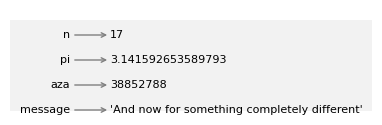

In [28]:
from diagram import diagram, adjust


width, height, x, y = [3.62, 1.01, 0.6, 0.76]
ax = diagram(width, height)
bbox = frame.draw(ax, x, y, dy=-0.25)
# adjust(x, y, bbox)

This kind of figure is called a **state diagram** because it shows what state each of the variables is in (think of it as the variable's state of mind).
We'll use state diagrams throughout the book to represent a model of how Python stores variables and their values.

## Variable names

Variable names can be as long as you like. They can contain both letters and numbers, but they can't begin with a number.
It is legal to use uppercase letters, but it is conventional to use only lower case for
variable names.

The only punctuation that can appear in a variable name is the underscore character, `_`. It is often used in names with multiple words, such as `your_name` or  `airspeed_of_unladen_swallow`.

If you give a variable an illegal name, you get a syntax error.
The name `million!` is illegal because it contains punctuation.

In [29]:
%%expect SyntaxError

million! = 1000000

SyntaxError: invalid syntax (ipython-input-4061783710.py, line 1)

`76trombones` is illegal because it starts with a number.

In [30]:
%%expect SyntaxError

76trombones = 'big parade'

SyntaxError: invalid decimal literal (ipython-input-3636686625.py, line 1)

`class` is also illegal, but it might not be obvious why.

In [1]:
%%expect SyntaxError

class = 'Self-Defence Against Fresh Fruit'

UsageError: Cell magic `%%expect` not found.


It turns out that `class` is a **keyword**, which is a special word used to specify the structure of a program.
Keywords can't be used as variable names.

Here's a complete list of Python's keywords:

```
False      await      else       import     pass
None       break      except     in         raise
True       class      finally    is         return
and        continue   for        lambda     try
as         def        from       nonlocal   while
assert     del        global     not        with
async      elif       if         or         yield
```

In [31]:
from keyword import kwlist

len(kwlist)

35

You don't have to memorize this list. In most development environments,
keywords are displayed in a different color; if you try to use one as a
variable name, you'll know.

## The import statement

In order to use some Python features, you have to **import** them.
For example, the following statement imports the `math` module.

In [2]:
import math

A **module** is a collection of variables and functions.
The math module provides a variable called `pi` that contains the value of the mathematical constant denoted $\pi$.
We can display its value like this.

In [3]:
math.pi

3.141592653589793

To use a variable in a module, you have to use the **dot operator** (`.`) between the name of the module and the name of the variable.

The math module also contains functions.
For example, `sqrt` computes square roots.

In [4]:
math.sqrt(25)

5.0

And `pow` raises one number to the power of a second number.

In [5]:
math.pow(5, 2)

25.0

At this point we've seen two ways to raise a number to a power: we can use the `math.pow` function or the exponentiation operator, `**`.
Either one is fine, but the operator is used more often than the function.

## Expressions and statements

So far, we've seen a few kinds of expressions.
An expression can be a single value, like an integer, floating-point number, or string.
It can also be a collection of values and operators.
And it can include variable names and function calls.
Here's an expression that includes several of these elements.

In [9]:
19 + n + round(math.pi) * 2

42

We have also seen a few kind of statements.
A **statement** is a unit of code that has an effect, but no value.
For example, an assignment statement creates a variable and gives it a value, but the statement itself has no value.

In [2]:
n = 17

Similarly, an import statement has an effect -- it imports a module so we can use the variables and functions it contains -- but it has no visible effect.

In [11]:
import math

Computing the value of an expression is called **evaluation**.
Running a statement is called **execution**.

## The print function

When you evaluate an expression, the result is displayed.

In [3]:
n + 1

18

But if you evaluate more than one expression, only the value of the last one is displayed.

In [4]:
n + 2
n + 3

20

To display more than one value, you can use the `print` function.

In [5]:
print(n+2)
print(n+3)

19
20


It also works with floating-point numbers and strings.

In [6]:
print('The value of pi is approximately')
print(math.pi)

The value of pi is approximately
3.141592653589793


You can also use a sequence of expressions separated by commas.

In [7]:
print('The value of pi is approximately', math.pi)

The value of pi is approximately 3.141592653589793


Notice that the `print` function puts a space between the values.

## Arguments

When you call a function, the expression in parenthesis is called an **argument**.
Normally I would explain why, but in this case the technical meaning of a term has almost nothing to do with the common meaning of the word, so I won't even try.

Some of the functions we've seen so far take only one argument, like `int`.

In [8]:
int('101')

101

Some take two, like `math.pow`.

In [9]:
math.pow(5, 2)

25.0

Some can take additional arguments that are optional.
For example, `int` can take a second argument that specifies the base of the number.

In [10]:
int('101', 2)

5

The sequence of digits `101` in base 2 represents the number 5 in base 10.

`round` also takes an optional second argument, which is the number of decimal places to round off to.

In [13]:
round(math.pi, 2)

3.14

Some functions can take any number of arguments, like `print`.

In [14]:
print('Any', 'number', 'of', 'arguments')

Any number of arguments


If you call a function and provide too many arguments, that's a `TypeError`.

In [ ]:
%%expect TypeError

float('123.0', 2)

In [19]:
float( '123')

123.0

If you provide too few arguments, that's also a `TypeError`.

In [ ]:
%%expect TypeError

math.pow(2)

And if you provide an argument with a type the function can't handle, that's a `TypeError`, too.

In [ ]:
%%expect TypeError

math.sqrt('123')

This kind of checking can be annoying when you are getting started, but it helps you detect and correct errors.

## Comments

As programs get bigger and more complicated, they get more difficult to read.
Formal languages are dense, and it is often difficult to look at a piece of code and figure out what it is doing and why.

For this reason, it is a good idea to add notes to your programs to explain in natural language what the program is doing.
These notes are called **comments**, and they start with the `#` symbol.

In [2]:
# number of seconds in 42:42
seconds = 42 * 60 + 42

In this case, the comment appears on a line by itself. You can also put
comments at the end of a line:

In [5]:
miles = 10 / 1.61     # 10 kilometers in miles

Everything from the `#` to the end of the line is ignored---it has no
effect on the execution of the program.

Comments are most useful when they document non-obvious features of the code.
It is reasonable to assume that the reader can figure out *what* the code does; it is more useful to explain *why*.

This comment is redundant with the code and useless:

In [4]:
v = 8     # assign 8 to v

This comment contains useful information that is not in the code:

In [ ]:
v = 8     # velocity in miles per hour

Good variable names can reduce the need for comments, but long names can
make complex expressions hard to read, so there is a tradeoff.

## Debugging

Three kinds of errors can occur in a program: syntax errors, runtime errors, and semantic errors.
It is useful to distinguish between them in order to track them down more quickly.

* **Syntax error**: "Syntax" refers to the structure of a program and the rules about that structure. If there is a syntax error anywhere in your program, Python does not run the program. It displays an error message immediately.

* **Runtime error**: If there are no syntax errors in your program, it can start running. But if something goes wrong, Python displays an error message and stops. This type of error is called a runtime error. It is also called an **exception** because it indicates that something exceptional has happened.

* **Semantic error**: The third type of error is "semantic", which means related to meaning. If there is a semantic error in your program, it runs without generating error messages, but it does not do what you intended. Identifying semantic errors can be tricky because it requires you to work backward by looking at the output of the program and trying to figure out what it is doing.

As we've seen, an illegal variable name is a syntax error.

In [8]:
# expect SyntaxError

million! = 1000000

SyntaxError: invalid syntax (ipython-input-1071378761.py, line 3)

If you use an operator with a type it doesn't support, that's a runtime error.

In [9]:
# expect TypeError

'126' / 3

TypeError: unsupported operand type(s) for /: 'str' and 'int'

Finally, here's an example of a semantic error.
Suppose we want to compute the average of `1` and `3`, but we forget about the order of operations and write this:

In [12]:
1 + 3 / 2

2.5

In [13]:
(1 + 3) / 2

2.0

When this expression is evaluated, it does not produce an error message, so there is no syntax error or runtime error.
But the result is not the average of `1` and `3`, so the program is not correct.
This is a semantic error because the program runs but it doesn't do what's intended.

## Glossary

**variable:**
A name that refers to a value.

**assignment statement:**
A statement that assigns a value to a variable.

**state diagram:**
A graphical representation of a set of variables and the values they refer to.

**keyword:**
A special word used to specify the structure of a program.

**import statement:**
A statement that reads a module file so we can use the variables and functions it contains.

**module:**
A file that contains Python code, including function definitions and sometimes other statements.

**dot operator:**
The operator, `.`, used to access a function in another module by specifying the module name followed by a dot and the function name.

**evaluate:**
Perform the operations in an expression in order to compute a value.

**statement:**
One or more lines of code that represent a command or action.

**execute:**
Run a statement and do what it says.

**argument:**
A value provided to a function when the function is called.

**comment:**
Text included in a program that provides information about the program but has no effect on its execution.

**runtime error:**
An error that causes a program to display an error message and exit.

**exception:**
An error that is detected while the program is running.

**semantic error:**
An error that causes a program to do the wrong thing, but not to display an error message.

## Exercises

In [ ]:
# This cell tells Jupyter to provide detailed debugging information
# when a runtime error occurs. Run it before working on the exercises.

%xmode Verbose

In [1]:
xmode Verbose

Exception reporting mode: Verbose


### Ask a virtual assistant

Again, I encourage you to use a virtual assistant to learn more about any of the topics in this chapter.

If you are curious about any of keywords I listed, you could ask "Why is class a keyword?" or "Why can't variable names be keywords?"

You might have noticed that `int`, `float`, and `str` are not Python keywords.
They are variables that represent types, and they can be used as functions.
So it is *legal* to have a variable or function with one of those names, but it is strongly discouraged. Ask an assistant "Why is it bad to use int, float, and str as variable names?"

Also ask, "What are the built-in functions in Python?"
If you are curious about any of them, ask for more information.

In this chapter we imported the `math` module and used some of the variable and functions it provides. Ask an assistant, "What variables and functions are in the math module?" and "Other than math, what modules are considered core Python?"

### Exercise

Repeating my advice from the previous chapter, whenever you learn a new feature, you should make errors on purpose to see what goes wrong.

-   We've seen that `n = 17` is legal. What about `17 = n`?

-   How about `x = y = 1`?

-   In some languages every statement ends with a semi-colon (`;`). What
    happens if you put a semi-colon at the end of a Python statement?

-   What if you put a period at the end of a statement?

-   What happens if you spell the name of a module wrong and try to import `maath`?

In [5]:
x = y = 1.

In [6]:
x.

SyntaxError: invalid syntax (ipython-input-1209101337.py, line 1)

In [4]:
y

1

### Exercise
Practice using the Python interpreter as a calculator:

**Part 1.**  The volume of a sphere with radius $r$ is $\frac{4}{3} \pi r^3$.
What is the volume of a sphere with radius 5? Start with a variable named `radius` and then assign the result to a variable named `volume`. Display the result. Add comments to indicate that `radius` is in centimeters and `volume` in cubic centimeters.

In [ ]:
# Solution goes here

In [9]:
radius = 5 # The Radius is in Centimeters

In [14]:
volume = 4/3*(math.pi*radius**3) # The Volume is in Cubic Centimeters

In [15]:
volume

523.5987755982987

**Part 2.** A rule of trigonometry says that for any value of $x$, $(\cos x)^2 + (\sin x)^2 = 1$. Let's see if it's true for a specific value of $x$ like 42.

Create a variable named `x` with this value.
Then use `math.cos` and `math.sin` to compute the sine and cosine of $x$, and the sum of their squared.

The result should be close to 1. It might not be exactly 1 because floating-point arithmetic is not exact---it is only approximately correct.

In [ ]:
# Solution goes here

In [ ]:
x = 42 # This is our variable

In [17]:
(math.cos(x))**2 + (math.sin(x))**2 # This is our formula to see if its true

1.0

**Part 3.** In addition to `pi`, the other variable defined in the `math` module is `e`, which represents the base of the natural logarithm, written in math notation as $e$. If you are not familiar with this value, ask a virtual assistant "What is `math.e`?" Now let's compute $e^2$ three ways:

* Use `math.e` and the exponentiation operator (`**`).

* Use `math.pow` to raise `math.e` to the power `2`.

* Use `math.exp`, which takes as an argument a value, $x$, and computes $e^x$.

You might notice that the last result is slightly different from the other two.
See if you can find out which is correct.

In [ ]:
# Solution goes here

In [21]:
math.e **

SyntaxError: invalid syntax (ipython-input-141420359.py, line 1)

In [ ]:
# Solution goes here

In [22]:
math.pow(math.e, 2)

7.3890560989306495

In [ ]:
# Solution goes here

In [23]:
math.exp(2)

7.38905609893065

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [ ]:
print('Hello'); print('World')

In [1]:
import math

# Calculate e raised to the power of 2
result = math.exp(2)
print(result)

# Calculate e raised to the power of 0
result_zero = math.exp(0)
print(result_zero)

7.38905609893065
1.0
